Used Car Price Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
vehicles = pd.read_csv("vehicles.csv")
print("Initial dataset shape:", vehicles.shape)
print("\nMissing values per column:\n", vehicles.isnull().sum())

Initial dataset shape: (426880, 18)

Missing values per column:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [4]:
# Data Preparation
vehicles = vehicles.dropna(subset=["price", "year", "manufacturer", "model", "odometer"])
vehicles = vehicles[
    (vehicles["price"] > 100) & (vehicles["price"] < 100000) &
    (vehicles["odometer"] > 100) & (vehicles["odometer"] < 300000) &
    (vehicles["year"] > 1950) & (vehicles["year"] <= 2024)
]
vehicles["vehicle_age"] = 2024 - vehicles["year"]

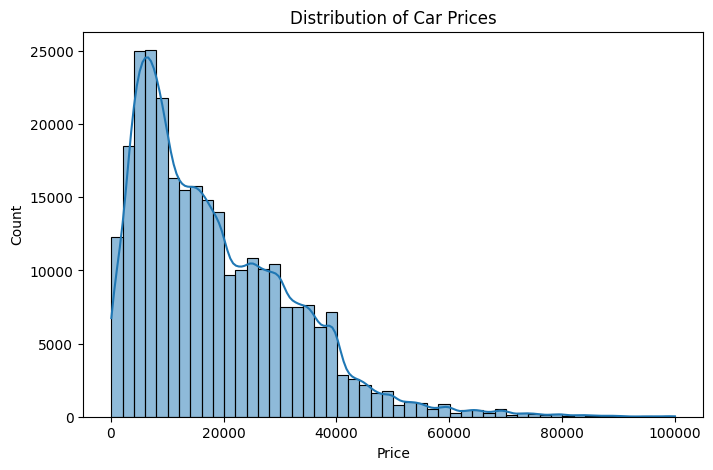

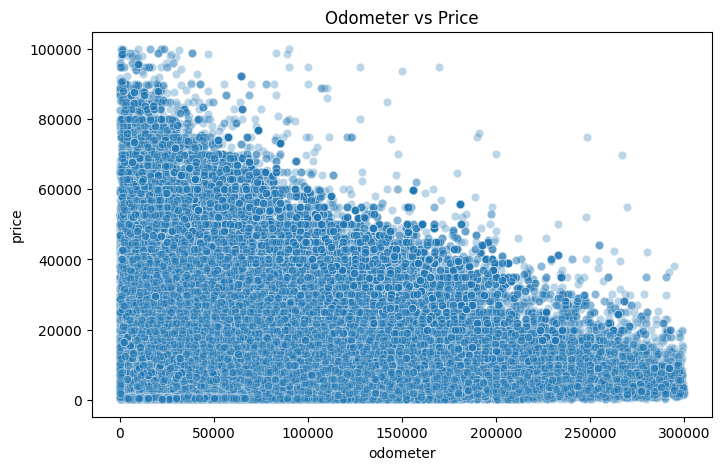

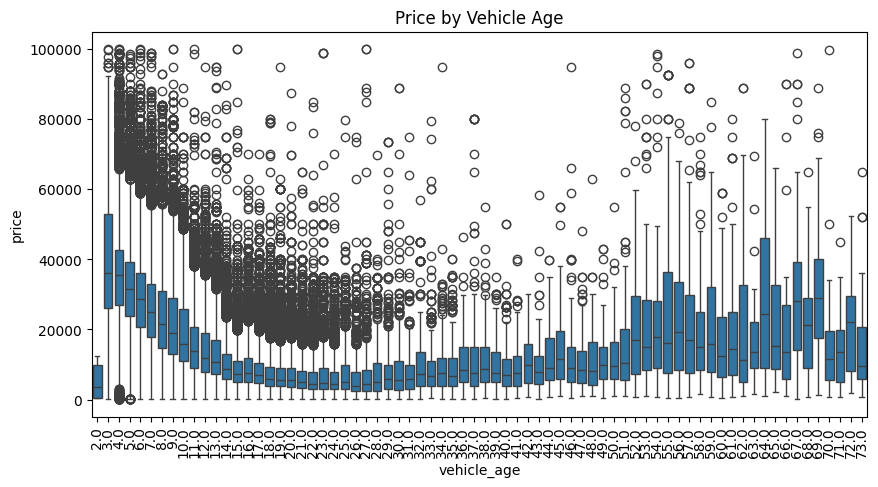

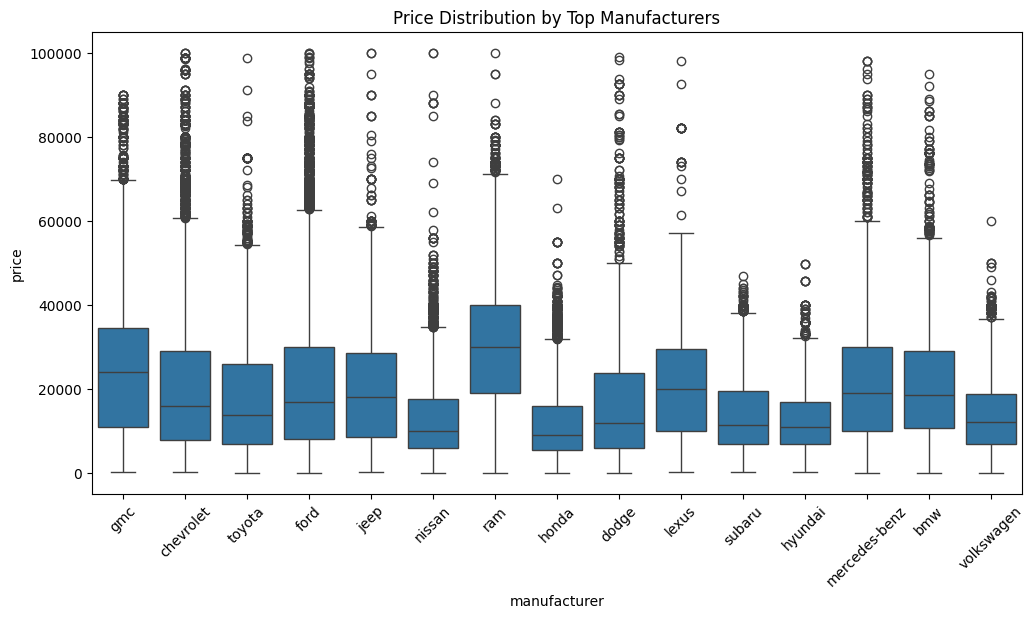

In [5]:
# Exploratory Data Analysis
plt.figure(figsize=(8, 5))
sns.histplot(vehicles["price"], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=vehicles, x="odometer", y="price", alpha=0.3)
plt.title("Odometer vs Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="vehicle_age", y="price", data=vehicles)
plt.title("Price by Vehicle Age")
plt.xticks(rotation=90)
plt.show()

top_makers = vehicles["manufacturer"].value_counts().head(15).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=vehicles[vehicles["manufacturer"].isin(top_makers)],
            x="manufacturer", y="price")
plt.title("Price Distribution by Top Manufacturers")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

features = ["vehicle_age", "odometer", "manufacturer", "fuel", "transmission", "title_status", "drive"]
target = "price"

model_df = vehicles[features + [target]].dropna()
X = model_df[features]
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(exclude="object").columns.tolist()

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder="passthrough")

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE by taking the square root of the MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: ${mae:,.2f}, RMSE: ${rmse:,.2f}")

MAE: $2,738.40, RMSE: $5,651.61


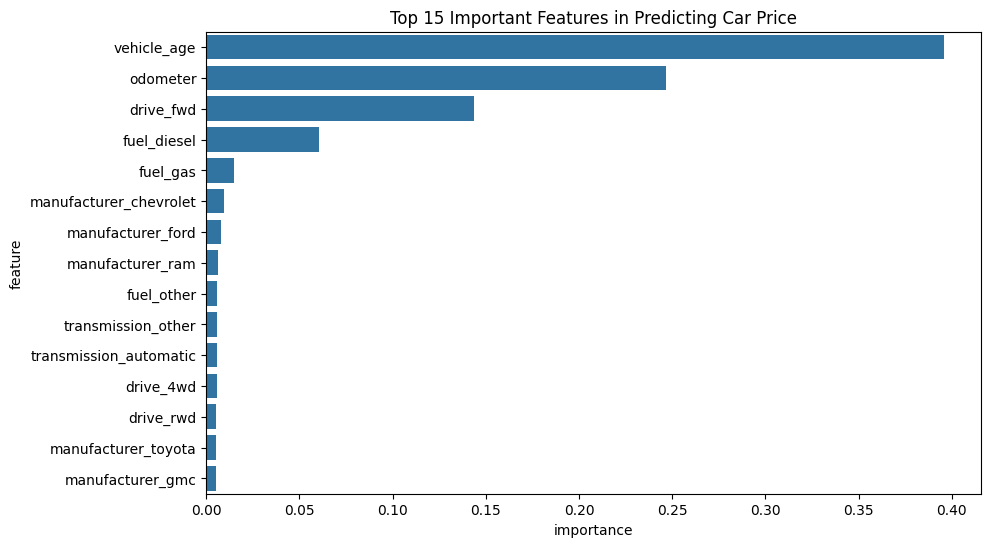

In [9]:
# Most Important Features in Predicting Car Price
rf_model = model.named_steps["regressor"]
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_feature_names) + numeric_cols

importances = pd.DataFrame({
    "feature": all_feature_names,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(15), x="importance", y="feature")
plt.title("Top 15 Important Features in Predicting Car Price")
plt.show()

In [10]:
# 6. Final Recommendations
print("""\n## 📋 Final Analysis & Recommendations

### 🔍 Key Findings

1. Vehicle Age: Newer cars retain more value; older cars depreciate quickly.
2. Odometer: Lower mileage correlates with higher prices.
3. Manufacturer: Brands like Toyota, Honda, Subaru retain value best.
4. Transmission & Drive: Automatic and AWD/4WD vehicles can boost price.
5. Title Status: Clean titles are worth significantly more.

### 💡 Business Recommendations

- Focus on low-mileage, recent model cars from value-retaining brands.
- Avoid rebuilt/salvage titles unless deeply discounted.
- Use the model to help assess fair pricing in real time.
- Consider regional preferences for AWD/4WD vehicles.

### 📊 Model Performance
MAE and RMSE show the model is reliable enough to guide practical pricing decisions.
""")


## 📋 Final Analysis & Recommendations

### 🔍 Key Findings

1. Vehicle Age: Newer cars retain more value; older cars depreciate quickly.
2. Odometer: Lower mileage correlates with higher prices.
3. Manufacturer: Brands like Toyota, Honda, Subaru retain value best.
4. Transmission & Drive: Automatic and AWD/4WD vehicles can boost price.
5. Title Status: Clean titles are worth significantly more.

### 💡 Business Recommendations

- Focus on low-mileage, recent model cars from value-retaining brands.
- Avoid rebuilt/salvage titles unless deeply discounted.
- Use the model to help assess fair pricing in real time.
- Consider regional preferences for AWD/4WD vehicles.

### 📊 Model Performance
MAE and RMSE show the model is reliable enough to guide practical pricing decisions.



Analysis

1. Vehicle Age: Newer cars retain more value; older cars depreciate quickly.
2. Odometer: Lower mileage correlates with higher prices.
3. Manufacturer: Brands like Toyota, Honda, Subaru retain value best.
4. Transmission & Drive: Automatic and AWD/4WD vehicles can boost price.
5. Title Status: Clean titles are worth significantly more.

Recommendations

- Focus on low-mileage, recent model cars from value-retaining brands.
- Avoid rebuilt/salvage titles unless deeply discounted.
- Use the model to help assess fair pricing in real time.
- Consider regional preferences for AWD/4WD vehicles.